In [2]:
import pandas as pd
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
business = pd.read_json('yelp_academic_dataset_business.json', lines=True)

In [4]:
business.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours'],
      dtype='object')

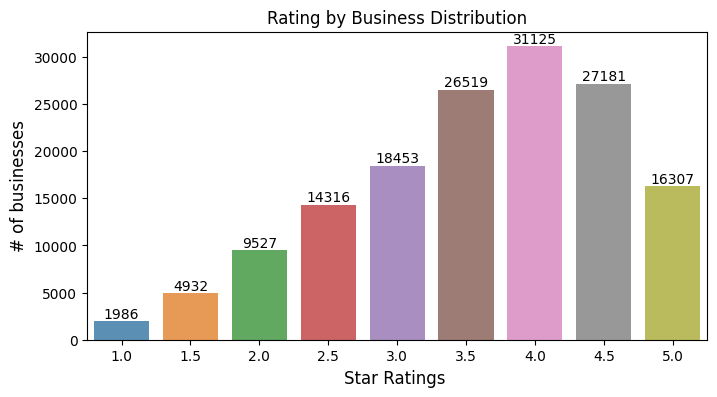

In [5]:
x = business['stars'].value_counts()
x = x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Rating by Business Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [6]:
restaurant_business = business[business['categories'].str.contains('restaurant', case=False, na=False)]
restaurant_business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
5,CF33F8-E6oudUQ46HnavjQ,Sonic Drive-In,615 S Main St,Ashland City,TN,37015,36.269593,-87.058943,2.0,6,1,"{'BusinessParking': 'None', 'BusinessAcceptsCr...","Burgers, Fast Food, Sandwiches, Food, Ice Crea...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-22:0', '..."
8,k0hlBqXX-Bt0vf1op7Jr1w,Tsevi's Pub And Grill,8025 Mackenzie Rd,Affton,MO,63123,38.565165,-90.321087,3.0,19,0,"{'Caters': 'True', 'Alcohol': 'u'full_bar'', '...","Pubs, Restaurants, Italian, Bars, American (Tr...",None
9,bBDDEgkFA1Otx9Lfe7BZUQ,Sonic Drive-In,2312 Dickerson Pike,Nashville,TN,37207,36.208102,-86.768170,1.5,10,1,"{'RestaurantsAttire': ''casual'', 'Restaurants...","Ice Cream & Frozen Yogurt, Fast Food, Burgers,...","{'Monday': '0:0-0:0', 'Tuesday': '6:0-21:0', '..."
11,eEOYSgkmpB90uNA7lDOMRA,Vietnamese Food Truck,,Tampa Bay,FL,33602,27.955269,-82.456320,4.0,10,1,"{'Alcohol': ''none'', 'OutdoorSeating': 'None'...","Vietnamese, Food, Restaurants, Food Trucks","{'Monday': '11:0-14:0', 'Tuesday': '11:0-14:0'..."


There are  54467  different types categories of Businesses in Yelp!


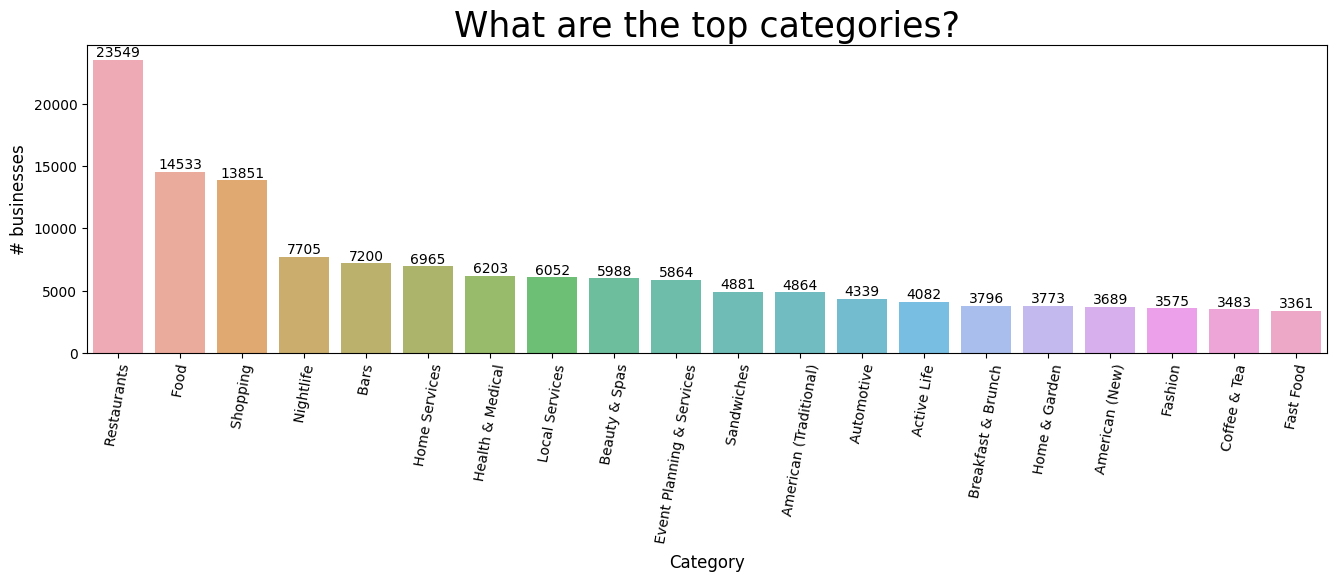

In [7]:
business_cats = ''.join(business['categories'].dropna())

cats=pd.DataFrame(business_cats.split(','),columns=['category'])
x=cats.category.value_counts()
print("There are ",len(x)," different types categories of Businesses in Yelp!")
#prep for chart
x=x.sort_values(ascending=False)
x=x.iloc[0:20]

#chart
fig, ax = plt.subplots(figsize=(16, 4))
sns.barplot(x=x.index, y=x.values, alpha=0.8, ax=ax)

plt.title("What are the top categories?",fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=80)
plt.ylabel('# businesses', fontsize=12)
plt.xlabel('Category', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [8]:
restaurant_business['attributes']

3         {'RestaurantsDelivery': 'False', 'OutdoorSeati...
5         {'BusinessParking': 'None', 'BusinessAcceptsCr...
8         {'Caters': 'True', 'Alcohol': 'u'full_bar'', '...
9         {'RestaurantsAttire': ''casual'', 'Restaurants...
11        {'Alcohol': ''none'', 'OutdoorSeating': 'None'...
                                ...                        
150325    {'BikeParking': 'True', 'BusinessAcceptsCredit...
150327    {'WiFi': ''free'', 'RestaurantsGoodForGroups':...
150336    {'WheelchairAccessible': 'False', 'Restaurants...
150339    {'RestaurantsDelivery': 'False', 'BusinessAcce...
150340    {'Ambience': '{'touristy': False, 'hipster': F...
Name: attributes, Length: 52286, dtype: object

In [9]:
# Expand the 'attributes' dictionary into separate columns
# Create a new DataFrame by converting the dictionaries in the 'attributes' column to individual columns
expanded_df = restaurant_business['attributes'].apply(lambda x: pd.Series(x, dtype='object'))
expanded_df.head()


,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BusinessParking,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,...,BestNights,BYOB,Corkage,BYOBCorkage,RestaurantsCounterService,Open24Hours,AgesAllowed,DietaryRestrictions,HairSpecializesIn,AcceptsInsurance
3,False,False,False,"{'garage': False, 'street': True, 'validated':...",True,1,True,False,u'free',u'none',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,True,True,True,None,False,1,True,False,u'no',u'none',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,False,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,1,True,NaN,u'free',u'full_bar',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,True,True,True,"{'garage': False, 'street': False, 'validated'...",NaN,1,True,False,u'no',u'none',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,None,NaN,"{'garage': False, 'street': False, 'validated'...",NaN,NaN,NaN,NaN,NaN,'none',...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# iterate over each column in the DataFrame
for col in expanded_df.columns:
    # calculate the value counts for the column
    counts = expanded_df[col].value_counts()
    # print the column name and the value counts
    print(col)
    print(counts)


RestaurantsDelivery
True     27567
False    17495
None      2596
Name: RestaurantsDelivery, dtype: int64
OutdoorSeating
False    21912
True     19971
None      1757
Name: OutdoorSeating, dtype: int64
BusinessAcceptsCreditCards
True     44141
False     1406
None        26
Name: BusinessAcceptsCreditCards, dtype: int64
BusinessParking
{'garage': False, 'street': False, 'validated': False, 'lot': True, 'valet': False}        17461
{'garage': False, 'street': False, 'validated': False, 'lot': False, 'valet': False}        9847
{'garage': False, 'street': True, 'validated': False, 'lot': False, 'valet': False}         7224
{'garage': False, 'street': True, 'validated': False, 'lot': True, 'valet': False}          2612
None                                                                                         738
                                                                                           ...  
{'garage': False, 'street': None, 'validated': False, 'lot': None, 'valet': True}  

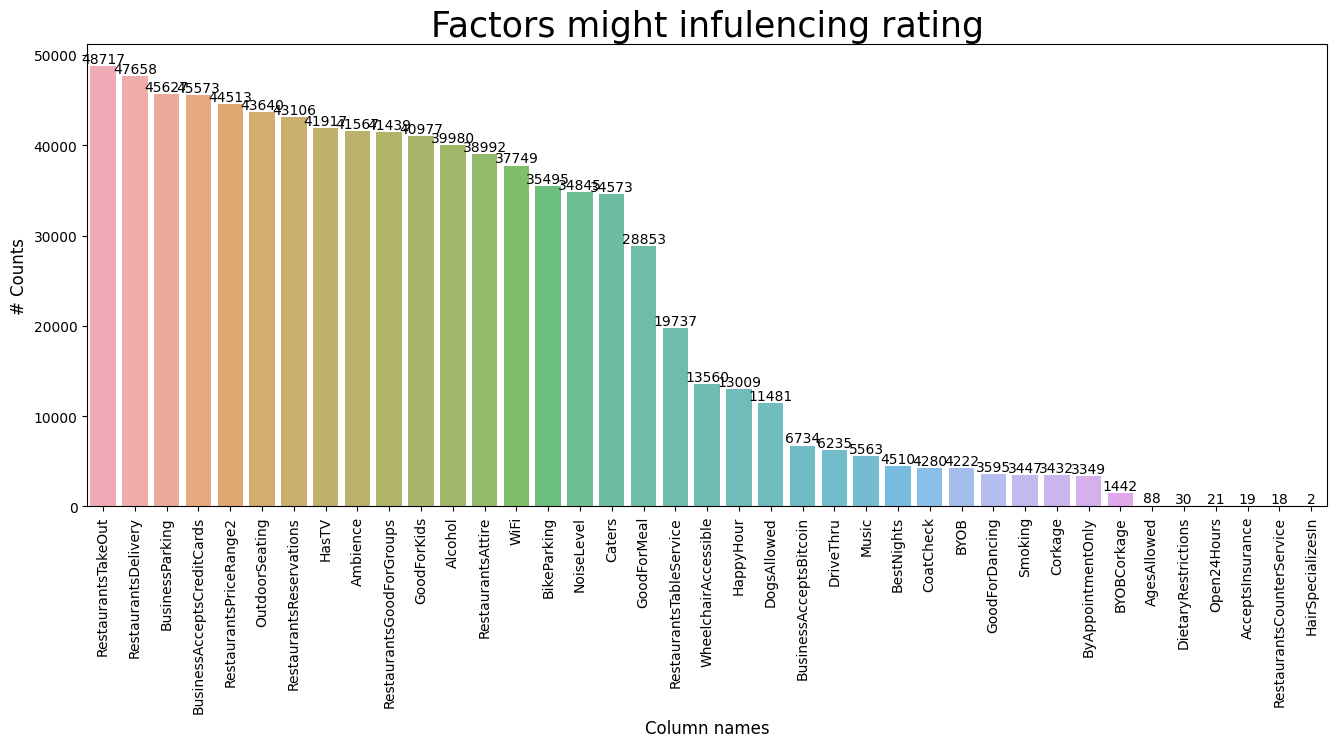

In [11]:
import seaborn as sns

# Create a dictionary to store the column names and their total counts
col_counts = {}

# Iterate over each column in the DataFrame
for col in expanded_df.columns:
    # Calculate the value counts for the column
    counts = expanded_df[col].value_counts()
    # Store the column name and total counts in the dictionary
    col_counts[col] = counts.sum()

# Sort the dictionary by counts in descending order
sorted_col_counts = dict(sorted(col_counts.items(), key=lambda item: item[1], reverse=True))

# Create a DataFrame from the sorted dictionary
counts_df = pd.DataFrame(list(sorted_col_counts.items()), columns=['Column', 'Counts'])

# Plot the bar chart using seaborn
fig, ax = plt.subplots(figsize=(16, 6))
sns.barplot(x='Column', y='Counts', data=counts_df, alpha=0.8, ax=ax)

plt.title("Factors might infulencing rating", fontsize=25)
locs, labels = plt.xticks()
plt.setp(labels, rotation=90)
plt.ylabel('# Counts', fontsize=12)
plt.xlabel('Column names', fontsize=12)

# Adding the text labels
rects = ax.patches
labels = counts_df['Counts'].values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, label, ha='center', va='bottom')

plt.show()


In [12]:
print(expanded_df['DietaryRestrictions'].unique())

[nan
 "{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}"
 "{'dairy-free': False, 'gluten-free': True, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}"
 "{'dairy-free': False, 'gluten-free': False, 'vegan': False, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}"
 "{'dairy-free': True, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': True, 'vegetarian': True}"
 'None'
 "{'dairy-free': False, 'gluten-free': False, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': False}"
 "{'dairy-free': False, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}"
 "{'dairy-free': True, 'gluten-free': True, 'vegan': True, 'kosher': False, 'halal': False, 'soy-free': False, 'vegetarian': True}"
 "{'dairy-free': False, 'gluten-free': False, 'vegan

In [13]:
len(col_counts)

39

In [14]:
cols_to_drop = expanded_df[['HairSpecializesIn','AcceptsInsurance','DietaryRestrictions','AgesAllowed','Open24Hours','BYOBCorkage']]
relevant_fac = expanded_df.drop(columns=cols_to_drop)

In [15]:
import pandas as pd
import ast

# The function is designed to convert dictionary-like columns in the DataFrame into separate columns, 
# with each key-value pair in the dictionary becoming a separate column.
def dict_to_columns(df, col_name):
    # Convert string representation of dictionary to an actual dictionary
    def parse_dict(x):
        try:
            return ast.literal_eval(str(x))
        except ValueError:
            return None

    df[col_name] = df[col_name].apply(parse_dict)

    # Get unique keys in the dictionaries of the column
    unique_keys = set()
    for _, val in df[col_name].dropna().items():
        unique_keys.update(val.keys())

    # Create new columns for each key in the dictionaries
    for key in unique_keys:
        df[f'{col_name}_{key}'] = df[col_name].apply(lambda x: x.get(key) if isinstance(x, dict) else None)

    # Drop the original column
    df.drop(columns=[col_name], inplace=True)

dict_columns = ['BusinessParking', 'Ambience', 'GoodForMeal', 'Music', 'BestNights', 'DietaryRestrictions']
for col in dict_columns:
    if col in relevant_fac.columns:
        dict_to_columns(relevant_fac, col)




In [16]:
relevant_fac.head(20)

,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,...,Music_video,Music_dj,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_sunday,BestNights_tuesday,BestNights_saturday,BestNights_monday,BestNights_thursday
3,False,False,False,True,1,True,False,u'free',u'none',True,...,None,None,None,None,None,None,None,None,None,None
5,True,True,True,False,1,True,False,u'no',u'none',False,...,None,None,None,None,None,None,None,None,None,None
8,False,True,True,NaN,1,True,NaN,u'free',u'full_bar',True,...,None,None,None,None,None,None,None,None,None,None
9,True,True,True,NaN,1,True,False,u'no',u'none',False,...,None,None,None,None,None,None,None,None,None,None
11,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,'none',NaN,...,None,None,None,None,None,None,None,None,None,None
12,True,False,True,False,1,True,NaN,u'no','none',NaN,...,None,None,None,None,None,None,None,None,None,None
14,True,False,True,True,1,True,NaN,u'no',u'none',True,...,None,None,None,None,None,None,None,None,None,None
15,True,True,True,NaN,2,True,NaN,'free','full_bar',NaN,...,None,None,None,None,None,None,None,None,None,None
19,None,None,True,True,1,True,NaN,u'no',u'none',True,...,None,None,None,None,None,None,None,None,None,None
20,False,False,NaN,NaN,2,True,NaN,u'free',u'beer_and_wine',True,...,None,None,None,None,None,None,None,None,None,None


In [17]:
relevant_fac.columns

Index(['RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut',
       'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters', 'RestaurantsAttire',
       'RestaurantsReservations', 'GoodForKids', 'CoatCheck', 'DogsAllowed',
       'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'WheelchairAccessible', 'HasTV', 'HappyHour', 'DriveThru', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'Smoking', 'GoodForDancing', 'BYOB',
       'Corkage', 'RestaurantsCounterService', 'BusinessParking_lot',
       'BusinessParking_street', 'BusinessParking_valet',
       'BusinessParking_validated', 'BusinessParking_garage',
       'Ambience_romantic', 'Ambience_casual', 'Ambience_intimate',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_hipster',
       'Ambience_classy', 'Ambience_upscale', 'Ambience_trendy',
       'GoodForMeal_dinner', 'GoodForMeal_lunch', 'GoodForMeal_breakfast',
       'GoodForMeal_d

In [18]:
# iterate over each column in the DataFrame
for col in relevant_fac.columns:
    # calculate the value counts for the column
    counts = relevant_fac[col].value_counts()
    # print the column name and the value counts
    print(col)
    print(counts)

RestaurantsDelivery
True     27567
False    17495
None      2596
Name: RestaurantsDelivery, dtype: int64
OutdoorSeating
False    21912
True     19971
None      1757
Name: OutdoorSeating, dtype: int64
BusinessAcceptsCreditCards
True     44141
False     1406
None        26
Name: BusinessAcceptsCreditCards, dtype: int64
BikeParking
True     26189
False     9272
None        34
Name: BikeParking, dtype: int64
RestaurantsPriceRange2
2       23128
1       19512
3        1662
4         195
None       16
Name: RestaurantsPriceRange2, dtype: int64
RestaurantsTakeOut
True     45382
False     2250
None      1085
Name: RestaurantsTakeOut, dtype: int64
ByAppointmentOnly
False    3221
True      127
None        1
Name: ByAppointmentOnly, dtype: int64
WiFi
u'free'    14938
u'no'      11375
'no'        5656
'free'      5483
u'paid'      166
'paid'        95
None          36
Name: WiFi, dtype: int64
Alcohol
u'none'             15641
u'full_bar'         11440
'none'               4662
u'beer_and_wine'    

In [19]:
# Convert string 'True' and 'False' to boolean values
relevant_fac = relevant_fac.replace({'True': True, 
                                     'False': False, 
                                     'None': False, 
                                     "u'free'": True,"'free'":True, "u'paid'": False,"u'no'":False, "'no'":False, "'paid'":False, 
                                     "u'none'":False,
                                     "u'full_bar'":True,"u'beer_and_wine'":True,"'full_bar'":True, "'beer_and_wine'":True,
                                     "u'casual'":True,"'casual'":True,"u'dressy'":False,"'dressy'":False,"'formal'":False,"u'formal'":False,
                                     "u'average'":True,"u'quiet'":True,"'average'":True,"u'loud'":False,"'quiet'":True,"u'very_loud'":False,"'loud'":False,"'very_loud'":False,
                                     "u'no'":False,"u'outdoor'":True, "u'yes'":True,"'no'":False,"'outdoor'":True,
                                     "'yes_free'":True,"'yes_corkage'":True,"u'yes_free'":True,"u'yes_corkage'":True,"'free'":True,
                                     "u'allages'":True,"u'21plus'":False,"u'18plus'":False,
                                     'none':False,'NaN':False,"'none'":False})

# Create a dictionary to map True and False to 1 and 0
boolean_map = {True: 1, False: 0}

# Apply the mapping to the entire dataframe
relevant_fac = relevant_fac.applymap(lambda x: boolean_map.get(x, x))

relevant_fac.head(5)


,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,...,Music_video,Music_dj,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_sunday,BestNights_tuesday,BestNights_saturday,BestNights_monday,BestNights_thursday
3,0.0,0.0,0.0,1.0,1,1.0,0.0,1.0,0.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.0,1.0,0.0,1,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.0,1.0,1.0,NaN,1,1.0,NaN,1.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1.0,1.0,1.0,NaN,1,1.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
relevant_fac = relevant_fac.dropna(axis = 1,how = 'all')
print (relevant_fac.shape)
relevant_fac.describe()

(52286, 62)


,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,ByAppointmentOnly,WiFi,Alcohol,Caters,RestaurantsAttire,...,Music_video,Music_dj,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_sunday,BestNights_tuesday,BestNights_saturday,BestNights_monday,BestNights_thursday
count,47658.000000,43640.000000,45573.000000,35495.000000,48717.000000,3349.000000,37749.000000,39980.000000,34573.000000,38992.000000,...,5209.000000,4894.000000,5053.0,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000
mean,0.578434,0.457631,0.968578,0.737822,0.931543,0.037922,0.540968,0.491321,0.593903,0.976841,...,0.002112,0.029628,0.0,0.158596,0.527321,0.141048,0.143048,0.520213,0.116615,0.256553
std,0.493815,0.498207,0.174458,0.439825,0.252530,0.191036,0.498325,0.499931,0.491110,0.150409,...,0.045909,0.169576,0.0,0.365340,0.499308,0.348110,0.350160,0.499647,0.320996,0.436779
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
relevant_fac_filled = relevant_fac.fillna(0)

In [22]:
relevant_fac_filled.isna().any()

RestaurantsDelivery           False
OutdoorSeating                False
BusinessAcceptsCreditCards    False
BikeParking                   False
RestaurantsPriceRange2        False
                              ...  
BestNights_sunday             False
BestNights_tuesday            False
BestNights_saturday           False
BestNights_monday             False
BestNights_thursday           False
Length: 62, dtype: bool

In [23]:
# concatenate the restaurant_business and expanded_df DataFrames along the columns axis
merged_df1 = pd.concat([restaurant_business, relevant_fac_filled], axis=1)

# create a list of columns to drop
cols_to_drop = ['attributes', 'hours', 'name', 'address', 'city', 'state', 'postal_code', 'latitude', 'longitude','is_open']

# drop the columns from the merged DataFrame
merged_df1 = merged_df1.drop(columns=cols_to_drop)

merged_df1.head()

,business_id,stars,review_count,categories,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsPriceRange2,RestaurantsTakeOut,...,Music_video,Music_dj,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_sunday,BestNights_tuesday,BestNights_saturday,BestNights_monday,BestNights_thursday
3,MTSW4McQd7CbVtyjqoe9mw,4.0,80,"Restaurants, Food, Bubble Tea, Coffee & Tea, B...",0.0,0.0,0.0,1.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,CF33F8-E6oudUQ46HnavjQ,2.0,6,"Burgers, Fast Food, Sandwiches, Food, Ice Crea...",1.0,1.0,1.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,k0hlBqXX-Bt0vf1op7Jr1w,3.0,19,"Pubs, Restaurants, Italian, Bars, American (Tr...",0.0,1.0,1.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,bBDDEgkFA1Otx9Lfe7BZUQ,1.5,10,"Ice Cream & Frozen Yogurt, Fast Food, Burgers,...",1.0,1.0,1.0,0.0,1,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11,eEOYSgkmpB90uNA7lDOMRA,4.0,10,"Vietnamese, Food, Restaurants, Food Trucks",0.0,0.0,0.0,0.0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


tips in the Yelp dataset are not necessarily representative of all the feedback that users have left about a business, as they are a small subset of the total reviews. Moreover, users may be more likely to leave tips if they have a particularly positive or negative experience, which may introduce some bias into the data.

In [24]:
review = pd.read_json('yelp_academic_dataset_review.json', lines=True)

In [25]:
review.columns

Index(['review_id', 'user_id', 'business_id', 'stars', 'useful', 'funny',
       'cool', 'text', 'date'],
      dtype='object')

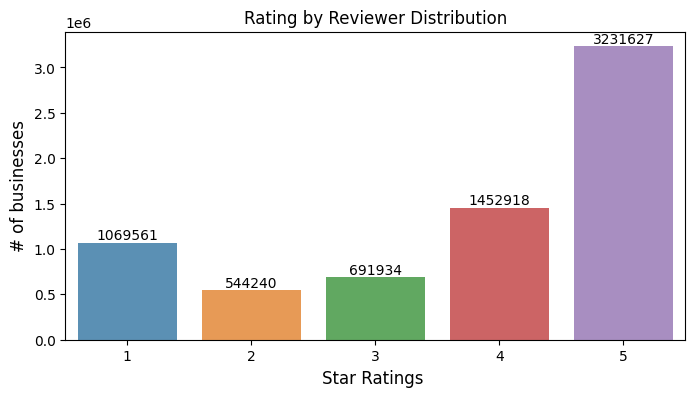

In [26]:
x = review['stars'].value_counts()
x = x.sort_index()
#plot
plt.figure(figsize=(8,4))
ax= sns.barplot(x=x.index, y=x.values, alpha=0.8)
plt.title("Rating by Reviewer Distribution")
plt.ylabel('# of businesses', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)

#adding the text labels
rects = ax.patches
labels = x.values
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width()/2, height + 5, label, ha='center', va='bottom')

plt.show()

In [27]:
user = pd.read_json('yelp_academic_dataset_user.json', lines=True)

In [28]:
user.columns

Index(['user_id', 'name', 'review_count', 'yelping_since', 'useful', 'funny',
       'cool', 'elite', 'friends', 'fans', 'average_stars', 'compliment_hot',
       'compliment_more', 'compliment_profile', 'compliment_cute',
       'compliment_list', 'compliment_note', 'compliment_plain',
       'compliment_cool', 'compliment_funny', 'compliment_writer',
       'compliment_photos'],
      dtype='object')

In [29]:
user_subset = user.loc[:, ['user_id', 'fans']]
merged_user = pd.merge(review, user_subset, on='user_id', how='left')

In [30]:
merged_user.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date,fans
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11,0.0
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18,0.0
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30,58.0
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03,0.0
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15,0.0


In [31]:
merged_user_restaurant = pd.merge(merged_user, merged_df1, on='business_id', how='left')

In [32]:
merged_user_restaurant_filled = merged_user_restaurant.fillna(0)

In [33]:
merged_user_restaurant.columns

Index(['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date', 'fans', 'stars_y', 'review_count', 'categories',
       'RestaurantsDelivery', 'OutdoorSeating', 'BusinessAcceptsCreditCards',
       'BikeParking', 'RestaurantsPriceRange2', 'RestaurantsTakeOut',
       'ByAppointmentOnly', 'WiFi', 'Alcohol', 'Caters', 'RestaurantsAttire',
       'RestaurantsReservations', 'GoodForKids', 'CoatCheck', 'DogsAllowed',
       'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'WheelchairAccessible', 'HasTV', 'HappyHour', 'DriveThru', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'Smoking', 'GoodForDancing', 'BYOB',
       'Corkage', 'RestaurantsCounterService', 'BusinessParking_lot',
       'BusinessParking_street', 'BusinessParking_valet',
       'BusinessParking_validated', 'BusinessParking_garage',
       'Ambience_romantic', 'Ambience_casual', 'Ambience_intimate',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_hipster',
     

In [34]:
cols_to_drop = ['review_id', 'user_id', 'business_id', 'stars_x', 'useful', 'funny',
       'cool', 'text', 'date','categories']

# drop the columns from the merged DataFrame
prepare_correlation = merged_user_restaurant.drop(columns=cols_to_drop)

prepare_correlation.columns

Index(['fans', 'stars_y', 'review_count', 'RestaurantsDelivery',
       'OutdoorSeating', 'BusinessAcceptsCreditCards', 'BikeParking',
       'RestaurantsPriceRange2', 'RestaurantsTakeOut', 'ByAppointmentOnly',
       'WiFi', 'Alcohol', 'Caters', 'RestaurantsAttire',
       'RestaurantsReservations', 'GoodForKids', 'CoatCheck', 'DogsAllowed',
       'RestaurantsTableService', 'RestaurantsGoodForGroups',
       'WheelchairAccessible', 'HasTV', 'HappyHour', 'DriveThru', 'NoiseLevel',
       'BusinessAcceptsBitcoin', 'Smoking', 'GoodForDancing', 'BYOB',
       'Corkage', 'RestaurantsCounterService', 'BusinessParking_lot',
       'BusinessParking_street', 'BusinessParking_valet',
       'BusinessParking_validated', 'BusinessParking_garage',
       'Ambience_romantic', 'Ambience_casual', 'Ambience_intimate',
       'Ambience_divey', 'Ambience_touristy', 'Ambience_hipster',
       'Ambience_classy', 'Ambience_upscale', 'Ambience_trendy',
       'GoodForMeal_dinner', 'GoodForMeal_lunch', 'Goo

In [35]:
prepare_correlation_drop = prepare_correlation.dropna(subset=['stars_y'])

In [36]:
print(prepare_correlation_drop.dtypes)

fans                   float64
stars_y                float64
review_count           float64
RestaurantsDelivery    float64
OutdoorSeating         float64
                        ...   
BestNights_sunday      float64
BestNights_tuesday     float64
BestNights_saturday    float64
BestNights_monday      float64
BestNights_thursday    float64
Length: 65, dtype: object


In [37]:
#Drop columns that have only NaN
prepare_correlation_drop = prepare_correlation_drop.dropna(axis = 1,how = 'all')
print (prepare_correlation_drop.shape)
prepare_correlation_drop.describe()

(4724684, 65)


,fans,stars_y,review_count,RestaurantsDelivery,OutdoorSeating,BusinessAcceptsCreditCards,BikeParking,RestaurantsTakeOut,ByAppointmentOnly,WiFi,...,Music_video,Music_dj,Music_no_music,BestNights_wednesday,BestNights_friday,BestNights_sunday,BestNights_tuesday,BestNights_saturday,BestNights_monday,BestNights_thursday
count,4.724677e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,...,4.724684e+06,4.724684e+06,4724684.0,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06,4.724684e+06
mean,1.242585e+01,3.792524e+00,4.925586e+02,5.824946e-01,5.613008e-01,9.408998e-01,7.338768e-01,8.950105e-01,9.499895e-03,5.283765e-01,...,3.545211e-04,3.569128e-03,0.0,3.659123e-02,1.374998e-01,3.731488e-02,3.544830e-02,1.357145e-01,2.923793e-02,6.588758e-02
std,8.228407e+01,6.258253e-01,8.501876e+02,4.931477e-01,4.962280e-01,2.358123e-01,4.419295e-01,3.065399e-01,9.700334e-02,4.991942e-01,...,1.882539e-02,5.963547e-02,0.0,1.877560e-01,3.443742e-01,1.895323e-01,1.849100e-01,3.424852e-01,1.684728e-01,2.480855e-01
min,0.000000e+00,1.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,3.500000e+00,9.000000e+01,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,4.000000e+00,2.210000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.000000e+00,4.000000e+00,5.080000e+02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.249700e+04,5.000000e+00,7.568000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,0.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [38]:
# Dropped Music_no_music because it is nearly zero column.
data = prepare_correlation_drop.drop(columns='Music_no_music')

/var/folders/vj/ngnq1p_916ldhdfl_wyxj0880000gn/T/ipykernel_7057/4149499064.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr(method='spearman')
/var/folders/vj/ngnq1p_916ldhdfl_wyxj0880000gn/T/ipykernel_7057/4149499064.py:11: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  selected_columns = sorted_correlations.head(8).append(sorted_correlations.tail(3)).index


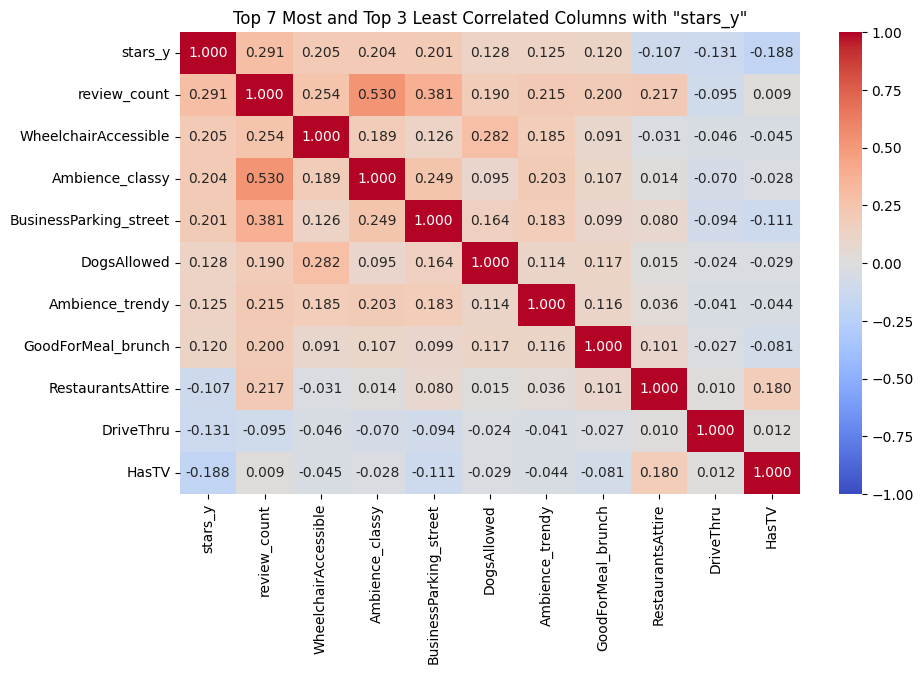

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr(method='spearman')

# Sort columns by correlation with 'stars_y'
sorted_correlations = corr_matrix['stars_y'].sort_values(ascending=False)

# Select the top 7 most and 3 least correlated columns
selected_columns = sorted_correlations.head(8).append(sorted_correlations.tail(3)).index

# Filter the correlation matrix to include only the selected columns
filtered_corr_matrix = corr_matrix.loc[selected_columns, selected_columns]

# Create a heatmap plot for the filtered correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(filtered_corr_matrix, annot=True, cmap='coolwarm', fmt='.3f', vmin=-1, vmax=1)

# Add plot title and labels
plt.title('Top 7 Most and Top 3 Least Correlated Columns with "stars_y"')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

The numbers shown on the heatmap are correlation coefficients that represent the strength and direction of the linear relationship between two variables. The correlation coefficients range from -1 to 1.

A correlation coefficient close to 1 indicates a strong positive linear relationship between the two variables, meaning that as one variable increases, the other variable tends to increase as well. A correlation coefficient close to -1 indicates a strong negative linear relationship, meaning that as one variable increases, the other variable tends to decrease.

A correlation coefficient close to 0 suggests that there is a weak or no linear relationship between the two variables. It's important to note that a correlation coefficient of 0 doesn't necessarily mean that there's no relationship at all; it could be that there's a non-linear relationship between the two variables.

In [59]:
selected_columns

Index(['stars_y', 'review_count', 'WheelchairAccessible', 'Ambience_classy',
       'BusinessParking_street', 'DogsAllowed', 'Ambience_trendy',
       'GoodForMeal_brunch', 'RestaurantsAttire', 'DriveThru', 'HasTV'],
      dtype='object')

In [65]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split
import numpy as np

# Split the data into X and y
X = data[['review_count', 'WheelchairAccessible', 'Ambience_classy',
       'BusinessParking_street', 'DogsAllowed', 'Ambience_trendy',
       'GoodForMeal_brunch', 'RestaurantsAttire', 'DriveThru', 'HasTV']]
y = data['stars_y']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")

# Calculate RMSE
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}")

# Print the model coefficients
print('Intercept:', model.intercept_)
for name, coef in zip(X.columns, model.coef_):
    print(name, ':', coef)


Mean Absolute Error (MAE): 0.4389283490295661
Mean Squared Error (MSE): 0.3245385885133892
Root Mean Squared Error (RMSE): 0.5696828841674895
Intercept: 3.8111863056050064
review_count : 7.26499446671567e-05
WheelchairAccessible : 0.17054416227612762
Ambience_classy : 0.11904288771070304
BusinessParking_street : 0.14484261101025786
DogsAllowed : 0.0771854161241509
Ambience_trendy : 0.06819402073760883
GoodForMeal_brunch : 0.10581085850380303
RestaurantsAttire : -0.16141097461307222
DriveThru : -0.5772022310452827
HasTV : -0.1534928961340869


In [61]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Create a new DataFrame with the relevant columns
regression_data = data[['stars_y', 'review_count', 'WheelchairAccessible', 'Ambience_classy',
       'BusinessParking_street', 'DogsAllowed', 'Ambience_trendy',
       'GoodForMeal_brunch', 'RestaurantsAttire', 'DriveThru', 'HasTV']]
# Define the model formula
formula1 = "stars_y ~ BusinessParking_street + Ambience_classy + WheelchairAccessible + review_count + Ambience_trendy + GoodForMeal_brunch + DogsAllowed + RestaurantsAttire + HasTV + DriveThru "

# Fit the model
model = smf.ols(formula1, data=regression_data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                stars_y   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.170
Method:                 Least Squares   F-statistic:                 9.708e+04
Date:                Wed, 29 Mar 2023   Prob (F-statistic):               0.00
Time:                        07:36:45   Log-Likelihood:            -4.0482e+06
No. Observations:             4724684   AIC:                         8.096e+06
Df Residuals:                 4724673   BIC:                         8.097e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3

The R-squared value is 0.175, which means that the model explains only 17.5% of the variance in the 'stars_y' variable. This is a relatively low value, indicating that the model might not be the best fit for this data.

The F-statistic is quite large, and the p-value associated with the F-statistic (Prob (F-statistic)) is 0.00, which means that the overall model is statistically significant.

All the predictor variables have statistically significant t-values (p < 0.05), indicating that they have a significant impact on the 'stars_y' variable.